In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sdipylib.plot import  source_attribution

# /Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
#   layout[ax.rowNum, ax.colNum] = ax.get_visible()
import warnings
warnings.simplefilter("ignore")

sns.set()

%run ../pylib/weights.py

In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Survey of Consumer Finances, Inheritance Extract
`federalreserve.gov-consumer_finances-2016e2019-inherit-1.1.3` Last Update: 2020-11-12T00:54:24

_An Extract from the survey of consumer finances for studying networth and ineritance, from multiple years_


This is an extract of the 2016 and 2019 Survey of Consumer Finances, with extracted variables
and recoded variables oriented toward studying inheritance.


 
## Images

[![doc_img](docs/networth_race_inc.png "networth_race_inc")](docs/networth_race_inc.png)

Net Worth by Income Percentile and Race
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [inherit_scf_16_19](data/inherit_scf_16_19.csv)**. Extract of the 2016 and 2019 SCF for inheritance and networth

## References
<ul><li> <strong>scf</string>, <em>metapack+http://library.metatab.org/federalreserve.gov-consumer_finances-1.1.1.csv</em>. Survey of consumer finances data packages</li><ul>

In [3]:
df = pkg.resource('inherit_scf_16_19').dataframe()
df = df[df.race.isin(['white','black'])]
df.head()

,year,case_id,record_id,implicate_id,age_1,age_2,hisp,race,addtional_race,unusual_income,...,gi_sum,n_gift,n_inherit,n_trust,n_transfer,any_transfer,any_inherit,hhsize,networthpc,assetpc
0,2016,1,11,1,71,0,5,white,5,3,...,0,0,0,0,0,0,0,1,187954.520394,188358.677918
1,2016,1,12,2,71,0,5,white,5,3,...,0,0,0,0,0,0,0,1,188071.513361,188465.035162
2,2016,1,13,3,71,0,5,white,5,3,...,0,0,0,0,0,0,0,1,187965.156118,188358.677918
3,2016,1,14,4,71,0,5,white,5,3,...,0,0,0,0,0,0,0,1,187965.156118,188358.677918
4,2016,1,15,5,71,0,5,white,5,3,...,0,0,0,0,0,0,0,1,188071.513361,188465.035162


In [4]:
# Count parent's bachelors degrees

def count_bach(r):
    return \
        int(r.ed_father_1 == 'bachelors') + \
        int(r.ed_father_2 == 'bachelors') + \
        int(r.ed_mother_1 == 'bachelors') + \
        int(r.ed_mother_2 == 'bachelors')
 
df['n_bach'] = df.apply(count_bach, axis=1)


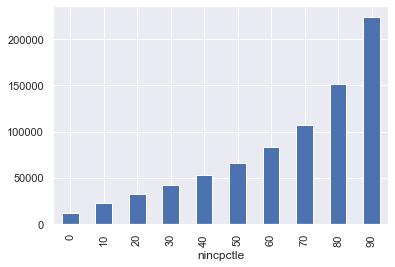

In [5]:
df[df.nincpctle<95].groupby('nincpctle').norminc.mean().plot.bar()

In [6]:
dfs = make_sample(df, extra_cols=['ninc', 'nincpctle' ,'homeeq','debt','equity', 'nfin', 'n_bach' ])
dfs.head()

,case_id,record_id,race,age_1,agecl,norminc,networth,asset,gi_sum,occat1,...,any_transfer,ninc,nincpctle,homeeq,debt,equity,nfin,n_bach,income_decile,gi_sum_decile
4823,968,9684,white,42,35-44,21545.800968,59453.699015,179105.597750,0,1,...,0,0,10,29780.028129,119651.898734,12762.869198,164215.583685,2,1,0.0
57548,5294,52944,white,20,<35,20362.358031,17000.000000,17000.000000,0,1,...,0,0,10,0.000000,0.000000,0.000000,0.000000,1,1,0.0
17004,3408,34085,white,31,<35,53864.502421,148049.282700,324389.592124,0,1,...,0,40,40,95721.518987,176340.309423,7976.793249,307372.433193,0,4,0.0
52029,4183,41835,white,75,>=75,63123.309897,147150.000000,404650.000000,0,1,...,0,40,50,96000.000000,257500.000000,8500.000000,347000.000000,0,5,0.0
32105,175,1751,black,29,<35,66177.663602,201400.000000,217400.000000,0,1,...,0,40,50,0.000000,16000.000000,11250.000000,35400.000000,1,5,0.0


In [7]:
dfs.n_bach.value_counts()

0    6020915
1    2047599
2    1324625
3     370790
4     236071
Name: n_bach, dtype: int64

In [8]:
dfs.groupby('race').networth.median()

race
black     18880.0
white    178150.0
Name: networth, dtype: float64

In [9]:
x = df.groupby('race').apply(wmedian,'networth')
print(x.white/x.black)
x

9.434322033898304


race
black     18880.0
white    178120.0
dtype: float64

In [10]:
x = df[df.gi_sum <= 0].groupby('race').apply(wmedian,'networth')
print(x.white/x.black)

9.476190476190474


In [11]:
t = dfs.groupby(['agecl','famstruct', 'nincpctle', 'race']).networth.median().unstack()
t = (t.white/t.black)
t = t[(t<10) & (t>0)]
t.mean()

2.7690046619369526

In [12]:
def wb_rmse(t):
    """ White/Black Root Mean Squared Error"""
    return np.mean(np.sqrt(((t.white - t.black)/t.white)**2))

0.7134539229427307

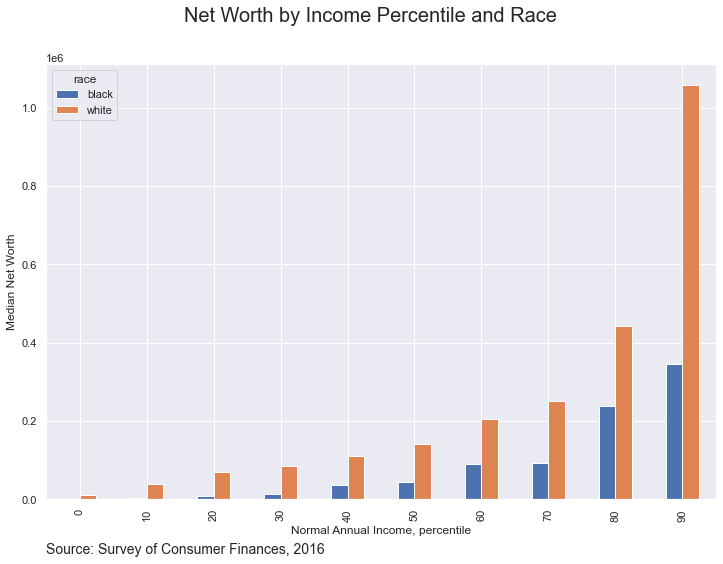

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race', fontsize=20)
t = dfs[dfs.nincpctle<95].groupby(['nincpctle', 'race']).networth.median().unstack()

t.plot.bar(ax=ax)

ax.text(0, -0.1,  f"Source: Survey of Consumer Finances, 2016", fontsize=14,
            horizontalalignment='left', verticalalignment='top',
            transform=ax.transAxes)

ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
plt.savefig('../docs/networth_race_inc.png')
wb_rmse(t)

In [14]:
nh = dfs[dfs.gi_sum == 0]  # "no help"
yh = dfs[dfs.gi_sum != 0] # " Yes help"

0.3442407467560285

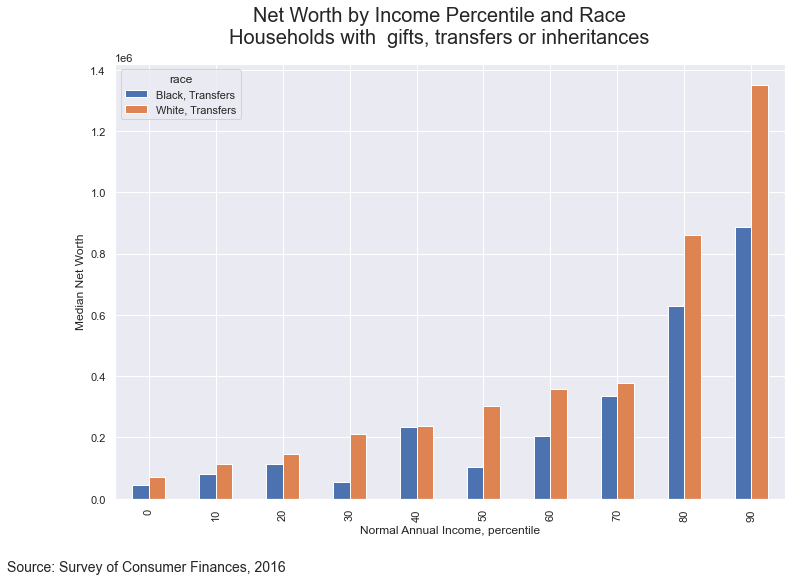

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds with  gifts, transfers or inheritances', fontsize=20)

t = yh[yh.nincpctle<95].groupby(['nincpctle','race']).networth.median().unstack()
#t = t1.join(t2)

t.rename(columns={'white':'White, Transfers', 'black':'Black, Transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

0.6711439647857824

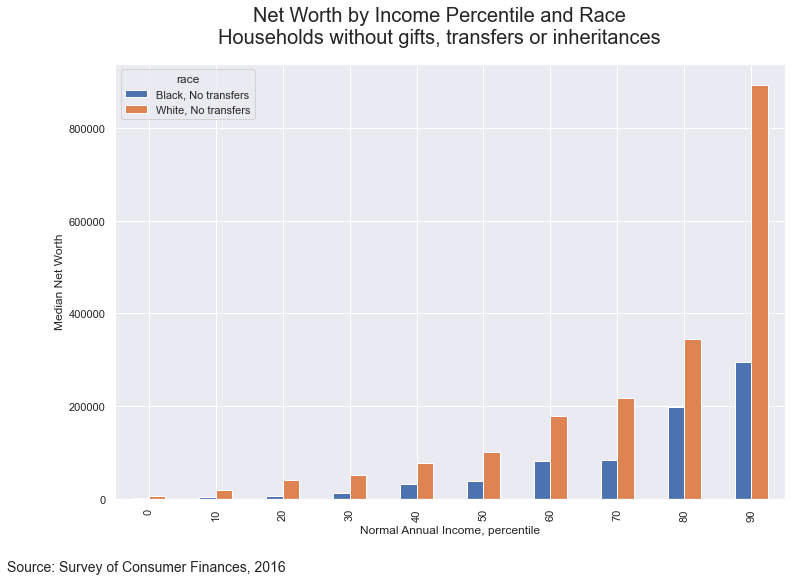

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds without gifts, transfers or inheritances', fontsize=20)
t = nh[nh.nincpctle < 95]
t = t.groupby(['nincpctle','race']).networth.median().unstack()

t.rename(columns={'white':'White, No transfers', 'black':'Black, No transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [17]:
dfs.edcl.value_counts()/len(dfs)

College         0.362968
Some College    0.288253
HS/GED          0.258398
No HS           0.090382
Name: edcl, dtype: float64

0.8476836047355053

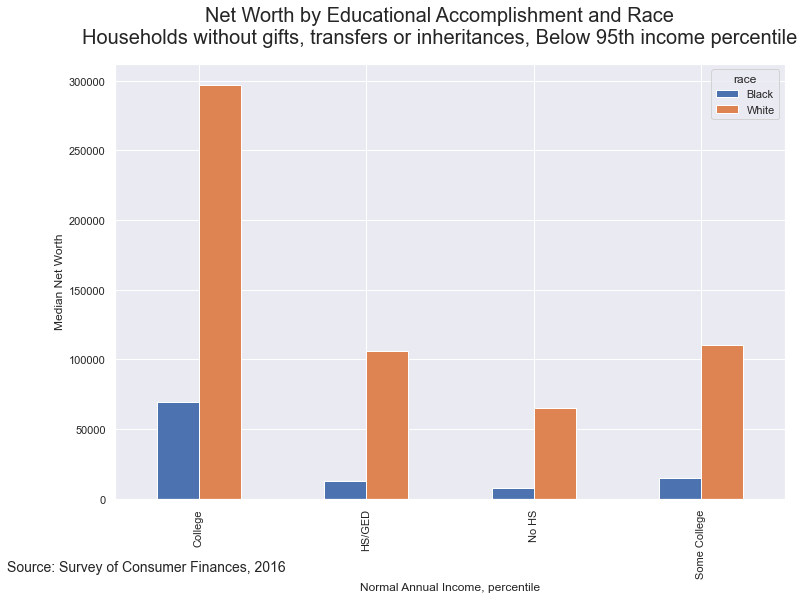

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Educational Accomplishment and Race\nHouseholds without gifts, transfers or inheritances, Below 95th income percentile', fontsize=20)
t = dfs[dfs.nincpctle < 95]
t = t.groupby(['edcl','race']).networth.median().unstack()

t.rename(columns={'white':'White', 'black':'Black'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [19]:
t = dfs.groupby('race').networth.median().to_frame().T
wb_rmse(t)

0.8940218916643278

In [20]:
(t.white - t.black)/t.white

networth    0.894022
dtype: float64

In [21]:
t = dfs.query( '(nincpctle <= 70) & (nincpctle >= 30) &  (married == 2) & ( age_1 >=35 ) & (age_1 <=55)')
t = t.groupby(['race',t.any_transfer]).networth.median().unstack().T
t

race,black,white
any_transfer,,
0,28556.919831,88808.298172
1,100799.000000,177776.132208


In [22]:
wb_rmse(t.loc[0])

0.678443113772455

In [23]:
wb_rmse(t.loc[1])

0.43300037666487895

In [24]:
dfs.groupby(['n_bach','race']).networth.median().unstack()

race,black,white
n_bach,,
0,17000.00000,150500.000000
1,22880.00000,188450.000000
2,26510.00000,199526.188467
3,141300.00000,415856.821378
4,-13209.56962,664800.000000


In [25]:
yh.groupby('race').networth.median()

race
black    119190.0
white    359700.0
Name: networth, dtype: float64

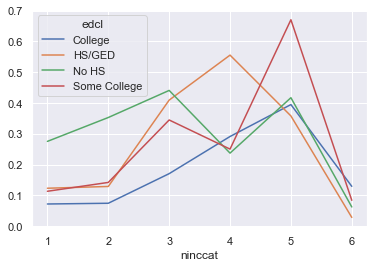

In [26]:
t = df.groupby(['ninccat','edcl','race']).networth.median().unstack()
t = t.black/t.white
t.unstack().plot()

# Role of Stocks and Home Equity

In [27]:
t = nh.copy()
t['house_r'] = t.homeeq/t.asset
t['eq_r'] = t.equity/t.asset
t['other_r'] = (t.asset-t.equity-t.homeeq)/t.asset
t['nfin_r'] = t.nfin/t.asset
t[['asset','networth','house_r', 'eq_r','other_r', 'nfin_r']].corr()

,asset,networth,house_r,eq_r,other_r,nfin_r
asset,1.000000,0.999201,-0.020400,0.096096,-0.037546,-0.021433
networth,0.999201,1.000000,-0.018750,0.094459,-0.038070,-0.027162
house_r,-0.020400,-0.018750,1.000000,-0.130554,-0.817841,0.391034
eq_r,0.096096,0.094459,-0.130554,1.000000,-0.463747,-0.439282
other_r,-0.037546,-0.038070,-0.817841,-0.463747,1.000000,-0.094469
nfin_r,-0.021433,-0.027162,0.391034,-0.439282,-0.094469,1.000000


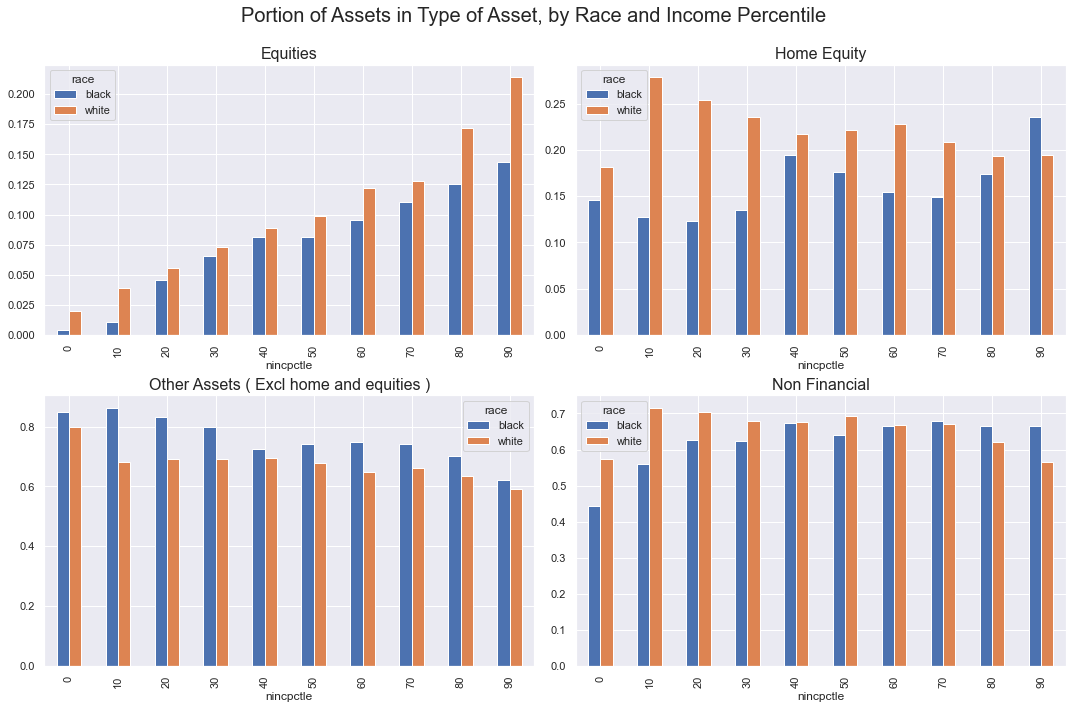

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = list(ax.flat)

g = t[t.nincpctle<95].groupby(['race','nincpctle'])

g.eq_r.mean().unstack().T.plot.bar(ax=ax[0]); ax[0].set_title('Equities', fontsize=16)
g.house_r.mean().unstack().T.plot.bar(ax=ax[1]); ax[1].set_title('Home Equity', fontsize=16)
g.other_r.mean().unstack().T.plot.bar(ax=ax[2]); ax[2].set_title('Other Assets ( Excl home and equities )', fontsize=16)
g.nfin_r.mean().unstack().T.plot.bar(ax=ax[3]); ax[3].set_title('Non Financial', fontsize=16)
fig.suptitle("Portion of Assets in Type of Asset, by Race and Income Percentile ", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.90)

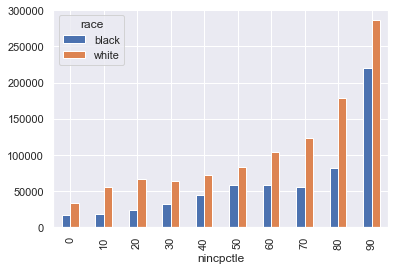

In [29]:
t = nh.copy()
t['he_nfin_r'] = (t.homeeq+t.equity)/ (t.homeeq+t.equity+t.nfin)
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
g.homeeq.mean().unstack().T.plot.bar()

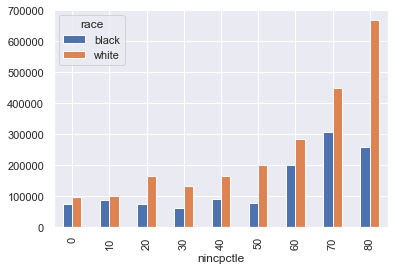

In [30]:
t = nh.copy()
t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T
t.plot.bar()

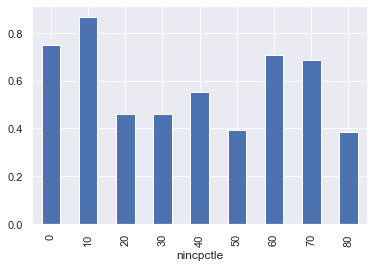

In [31]:
(t.black/t.white).plot.bar()

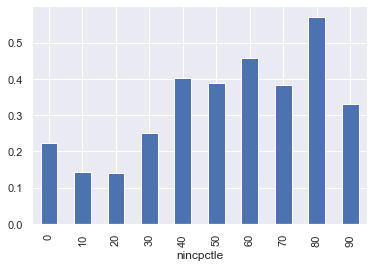

In [32]:
t = nh.copy()
#t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T

(t.black/t.white).plot.bar()

In [33]:
t = dfs[dfs.age_1 <45].groupby(['nincpctle','race']).any_transfer.mean().unstack() 
t

race,black,white
nincpctle,,
0,0.018519,0.116895
10,0.049949,0.179357
20,0.031492,0.140547
30,0.072075,0.122901
40,0.136306,0.150409
50,0.121482,0.155184
60,0.040003,0.190199
70,0.081473,0.187451
80,0.020208,0.149095


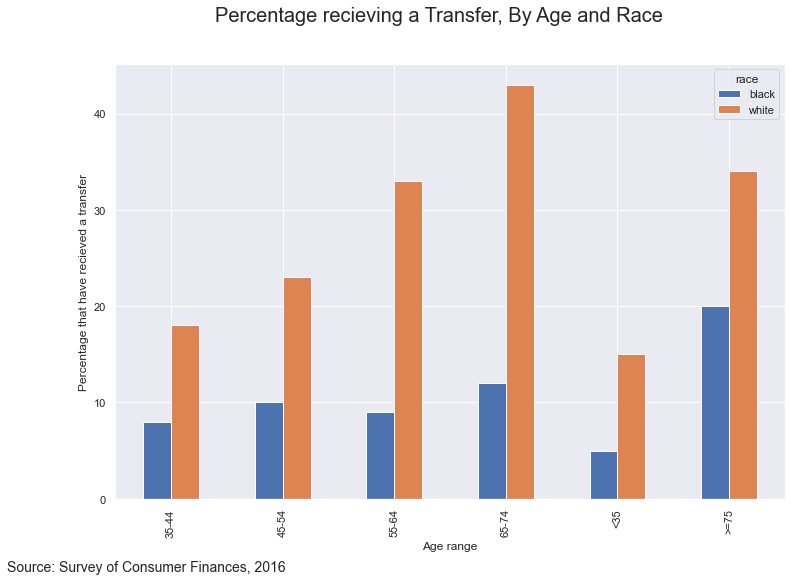

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Percentage recieving a Transfer, By Age and Race', fontsize=20)

t = (dfs.groupby(['race', 'agecl']).any_transfer.mean()*100).round(0).unstack().T

t.plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Age range')
ax.set_ylabel('Percentage that have recieved a transfer');

